[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.7060518731988472


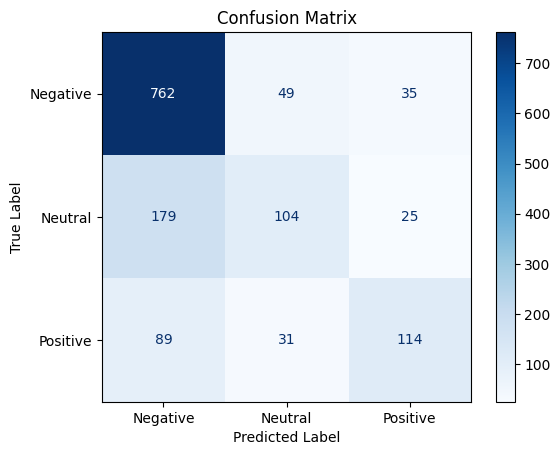

Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.90      0.81       846
     Neutral       0.57      0.34      0.42       308
    Positive       0.66      0.49      0.56       234

    accuracy                           0.71      1388
   macro avg       0.65      0.58      0.60      1388
weighted avg       0.69      0.71      0.68      1388



In [57]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
dataset = pd.read_csv('Sentiment.csv')  # Ensure it has 'text' and 'sentiment' columns

# Train-test split
train, test = train_test_split(dataset, test_size=0.1, random_state=42)

# Preprocessing function
def Clean_text(data):
    tweets = []
    sentiments = []
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    for _, row in data.iterrows():
        # Clean text
        sentence = re.sub(r"[^a-zA-Z0-9 ]", " ", str(row.text))  # Ensure it's a string
        words = sentence.lower().split()
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
        cleaned_sentence = ' '.join(words)
        tweets.append(cleaned_sentence)
        sentiments.append(row.sentiment)
    return tweets, sentiments

# Clean text
clean_train_tweets, train_sentiments = Clean_text(train)
clean_test_tweets, test_sentiments = Clean_text(test)

# Vectorization
cv = CountVectorizer(ngram_range=(1, 3))
X_train = cv.fit_transform(clean_train_tweets)
X_test = cv.transform(clean_test_tweets)

# Model training
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, train_sentiments)

# Prediction
y_pred = classifier.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(test_sentiments, y_pred))

# Confusion Matrix
cm = confusion_matrix(test_sentiments, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(test_sentiments, y_pred))
